In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt


# Importing the file and transferred in dataFrame

In [2]:
df=pd.read_csv("../US_Accidents_June20.csv")
df.head(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
# Finiding Null rows and sorting in ascending order
null_values = df.isna().sum() / len(df)
null_values.sort_values(ascending=True,inplace=True)


## Finding the NUll Values columns

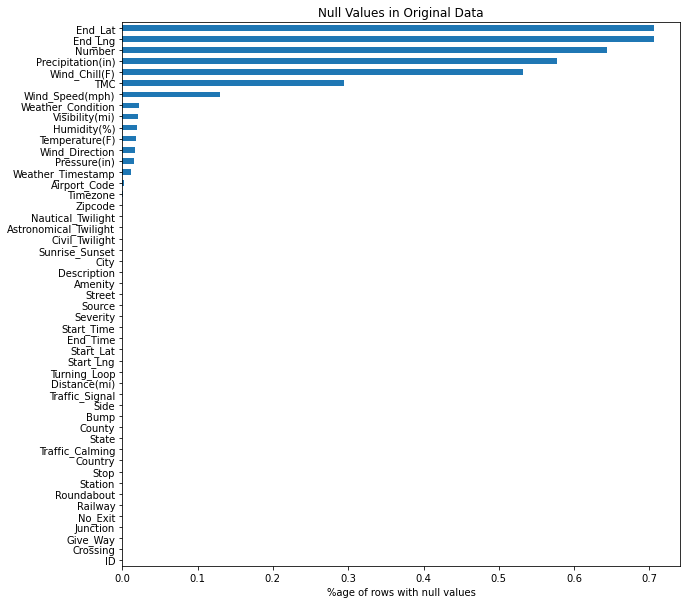

In [6]:

# Visualization
plt.figure(figsize=(10, 10))
plt.title('Null Values in Original Data')
plt.xlabel('%age of rows with null values')
null_values.plot(kind='barh');

### End_Lat,End_Lng,Number and precipitation has more than 50% null values .I will drop null values.

In [8]:
#Drop null values, subject to change
new_df=df.dropna()


## Accidents by States

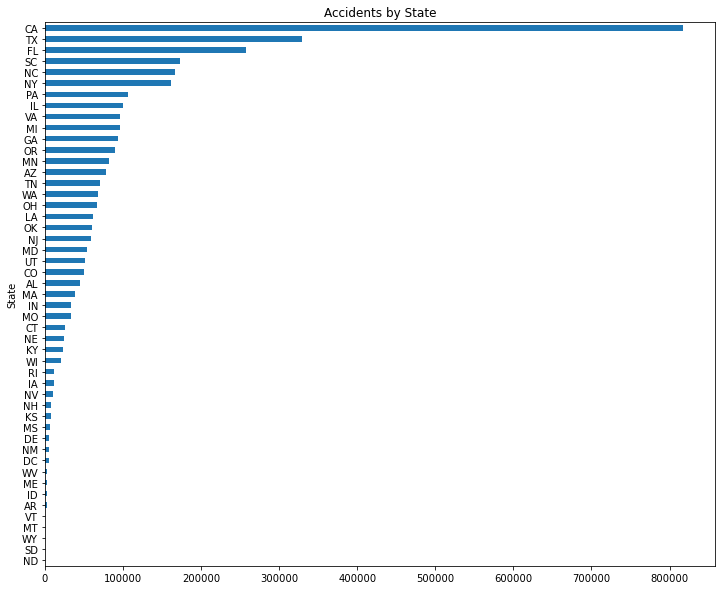

In [9]:
plt.figure(figsize=(12, 10))
plt.title('Accidents by State')
df.groupby('State').size().sort_values().plot(kind='barh')

### California ,Texas and Florida are top 3 states with more accidents,But California's accident number is highest .Texas and Florida has half number of  accidents in comparison of California.

## Accident Severity

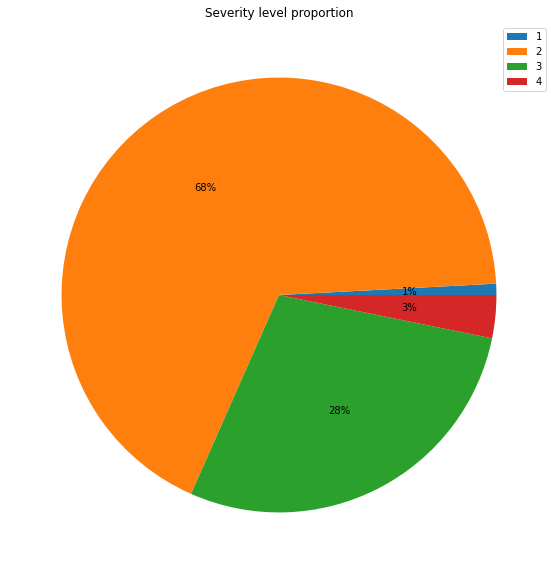

In [10]:
plt.figure(figsize=(12, 10))
plt.title('Severity level proportion')
df.groupby('Severity').size().plot(kind='pie',  autopct='%1.0f%%',label="",legend=True,labels=None)

### 68 % Accidents fall in the Severity class 2 followed by Severity class 3,4 and 1

## Top 10 cities with the most accidents

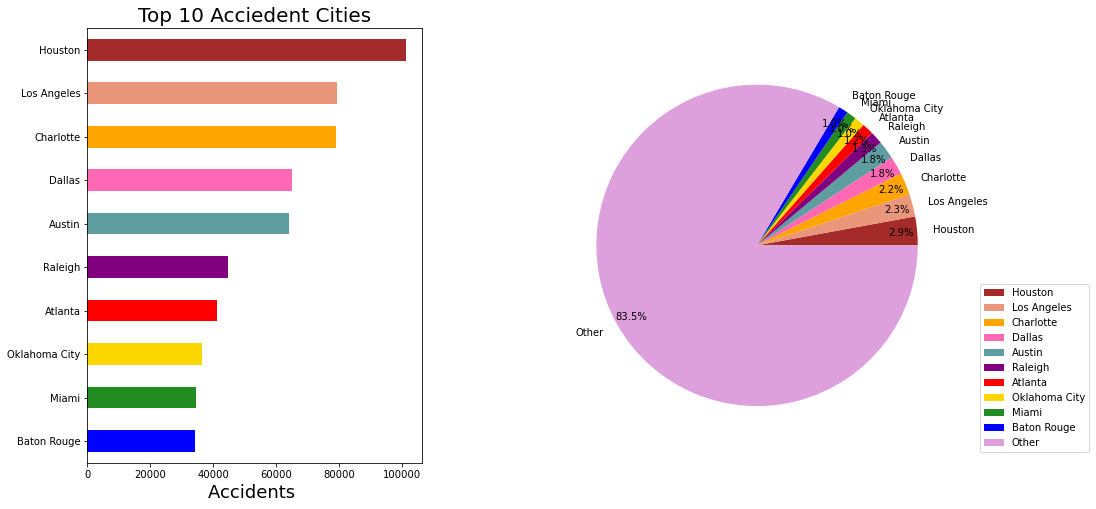

In [13]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
clr = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
df.City.value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh',color=clr,ax=ax[0])
ax[0].set_title("Top 10 Acciedent Cities",size=20)
ax[0].set_xlabel('Accidents ',size=18)


count=df['City'].value_counts()
groups=list(df['City'].value_counts().index)[:10]
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
qx = type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
plt.legend(loc=0, bbox_to_anchor=(1.15,0.4)) 
plt.subplots_adjust(wspace =0.5, hspace =0)
plt.ioff()
plt.ylabel('')
pass


## Top Weather Conditions during Accidents


Text(0.5, 1.0, 'Top Weather Conditions during Traffic Accidents')

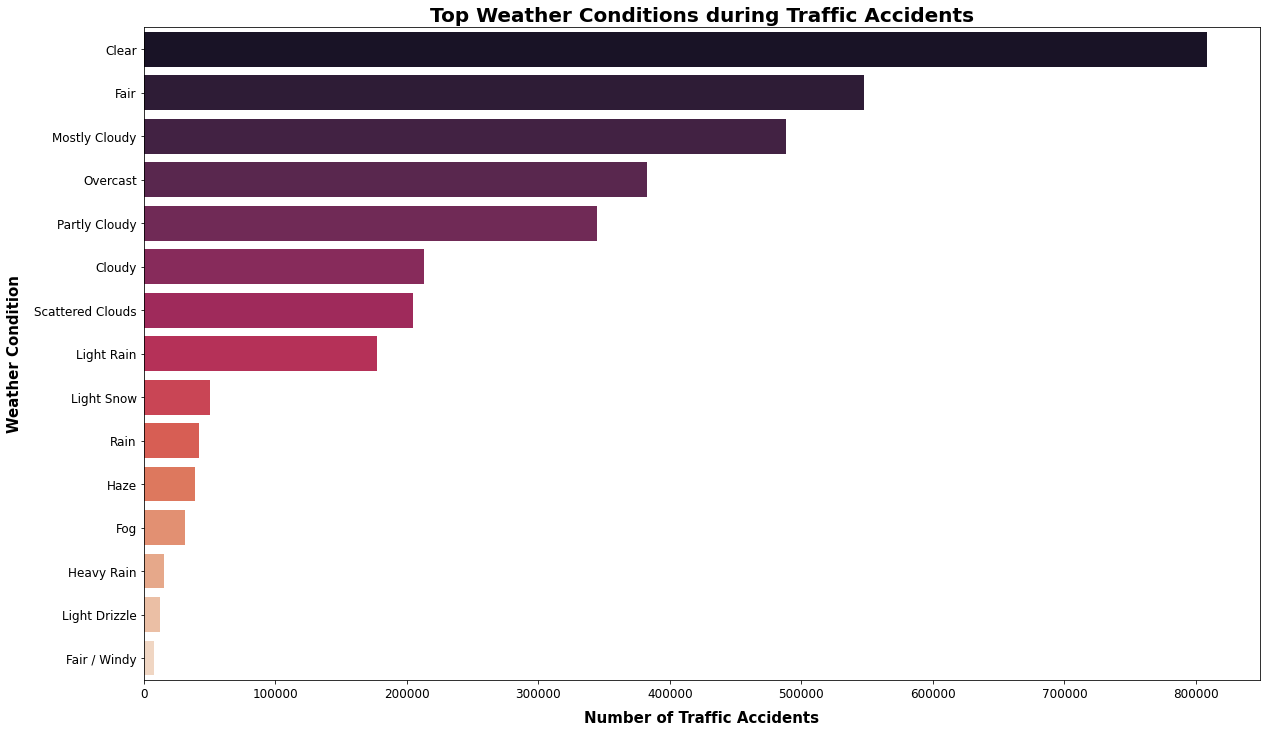

In [60]:

top_weather_Conditions = pd.DataFrame(df['Weather_Condition'].value_counts().head(15))

plt.figure(figsize=(20,12))
sns.barplot(top_weather_Conditions['Weather_Condition'],top_weather_Conditions.index,palette="rocket")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Number of Traffic Accidents", labelpad = 10, fontsize=15,weight='bold')
plt.ylabel("Weather Condition", labelpad = 12,fontsize=15, weight='bold')
plt.title("Top Weather Conditions during Traffic Accidents", fontsize=20,weight='bold')          

### Most of the accidents occured during clear and fair weather

## Top Traffic and Road conditions surroundings during accidents

In [62]:
surround = ['Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']
count = {}

for i in range(len(surround)):
    try:
        acc_count = df[surround[i]].value_counts()[1]
        count.setdefault(surround[i], acc_count)
    except(KeyError):
        count.setdefault(surround[i],0)

In [63]:
surroundings = pd.DataFrame.from_dict(count, orient = 'index', columns = ['Accidents'])
surroundings = surroundings.sort_values('Accidents', ascending = False)
surroundings

,Accidents
Traffic_Signal,623623
Junction,284449
Crossing,274526
Station,70321
Stop,51976
Amenity,42082
Railway,31175
Give_Way,9564
No_Exit,4384
Traffic_Calming,1401


Text(0.5, 1.0, 'Common Road Features and Traffic during Accidents')

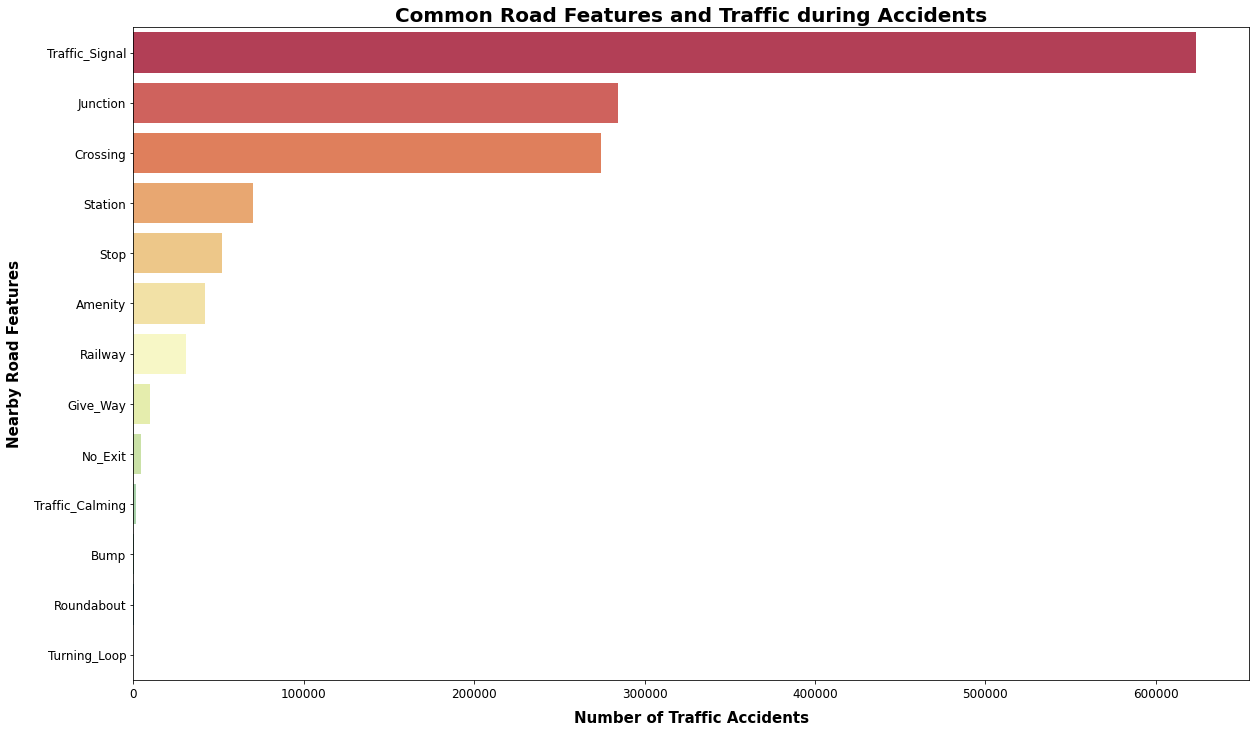

In [66]:
plt.figure(figsize=(20,12))
sns.barplot(surroundings['Accidents'],surroundings.index, palette = 'Spectral')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Number of Traffic Accidents", labelpad = 10, fontsize=15,weight='bold')
plt.ylabel("Nearby Road Features", labelpad = 12,fontsize=15, weight='bold')
plt.title("Common Road Features and Traffic during Accidents", fontsize=20,weight='bold')

### Most of the Accidents occured close to the Traffic lights

## Traffic Percentage By Time

Text(0.5, 1.0, 'Traffic Accidents Percentages by Time')

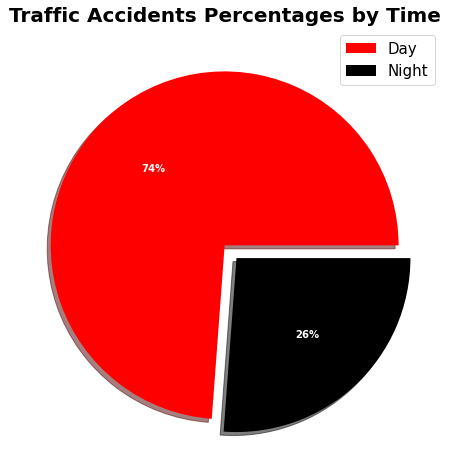

In [70]:
plt.figure(figsize = (12,8))
daynight = plt.pie(df['Sunrise_Sunset'].value_counts(),autopct='%1.0f%%',shadow = True, explode = (0,0.1), colors = ['red','black'], textprops=dict(color="w",weight = 'bold'))
plt.legend(['Day','Night'], loc="best",prop={'size': 15})
plt.title('Traffic Accidents Percentages by Time',fontsize=20,weight='bold')

###  74% accidents occur during the dat time